In [1]:
# Revenue Model - Merge the NYISO data w/ Solar Generation

In [2]:
# Import libraries
import sys, os
sys.path.append(os.path.abspath(".."))
import pandas as pd
import pytz
from src.market_analysis import merge_generation_and_prices, compute_capture_price, visualize_revenue
from src.report_utils import save_dataframe

DATA_DIR = "../data"
OUTPUT_DIR = "../outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [3]:
# Load cleaned NYISO price data
prices = pd.read_csv(os.path.join(OUTPUT_DIR, "lbmp_zoneA_cleaned.csv"), index_col=0)

# Convert index safely (force UTC normalization)
prices.index = pd.to_datetime(prices.index, utc=True, errors='coerce')

# Then convert to working timezone
prices.index = prices.index.tz_convert("America/New_York")

#print("Prices index type:", type(prices.index))
#print("Prices index:", prices.index[0], "→", prices.index.tz)
#print("Prices tz:", prices.index.tz)

In [4]:
# Load solar generation data
solar = pd.read_csv(os.path.join(OUTPUT_DIR, "solar_hourly_2024.csv"), index_col=0)

# Convert index safely (force UTC normalization)
solar.index = pd.to_datetime(solar.index, utc=True, errors='coerce')

# Then convert to working timezone
solar.index = solar.index.tz_convert("America/New_York")
#print("Solar index type:", type(solar.index))
#print("Solar index:", solar.index[0], "→", solar.index.tz)
#print("Solar tz:", solar.index.tz)

In [5]:
# Merge and compute revenue
merged = merge_generation_and_prices(prices, solar)
summary = compute_capture_price(merged)
save_dataframe(merged, "merged_solar_price_revenue.csv")

print("=== Summary ===")
for k, v in summary.items():
    print(f"{k}: {v:,.2f}")

Saved DataFrame → merged_solar_price_revenue.csv
=== Summary ===
Total Generation (MWh/MW): 1,204.90
Total Revenue ($/MW): 38,639.57
Capture Price ($/MWh): 32.07
Capacity Factor: 0.14


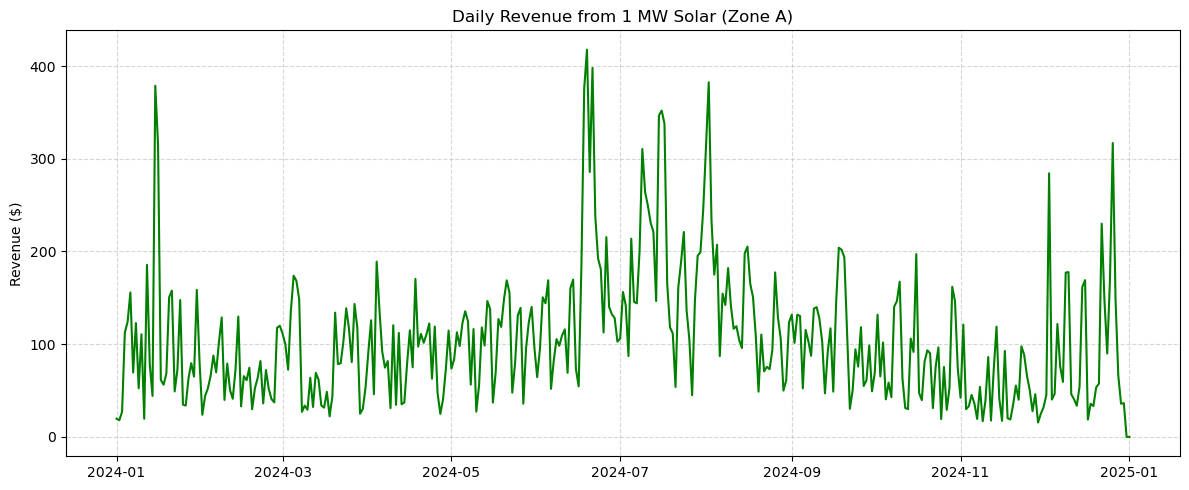

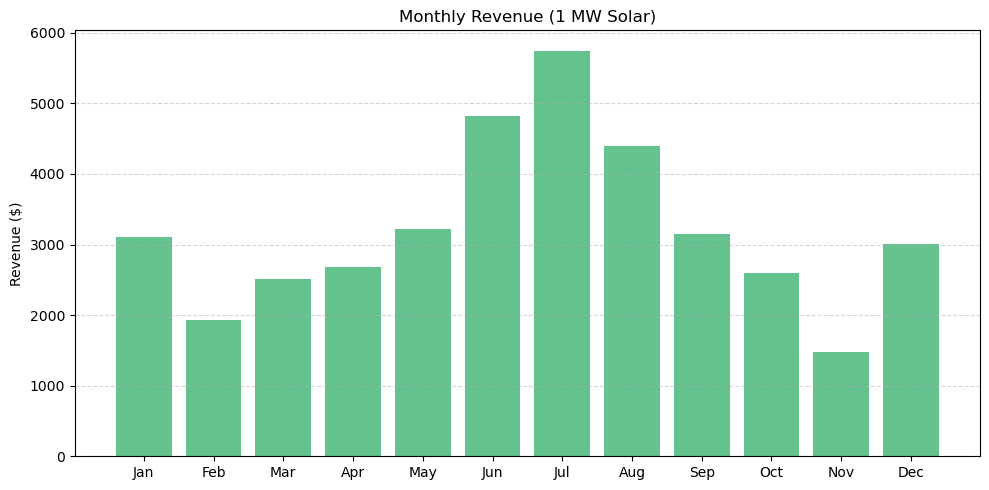

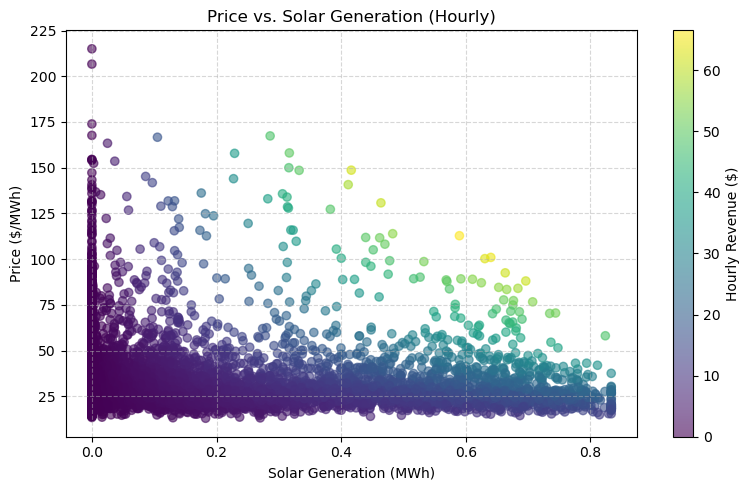

In [6]:
visualize_revenue(merged)

In [7]:
# Ensure correct merge prior to introducing battery model
print(prices.index.is_monotonic_increasing)
print(len(prices), prices.index.nunique())
#2024 is a leap year - expect 366x24 hours = 8784 hours
expected_hours = pd.date_range("2024-01-01 00:00", "2024-12-31 23:00", freq="h", tz="America/New_York")
missing = expected_hours.difference(prices.index)
duplicates = prices.index.duplicated().sum()

print(f"Missing timestamps: {len(missing)}")
print(f"Duplicate timestamps: {duplicates}")

True
8784 8784
Missing timestamps: 0
Duplicate timestamps: 0
